In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Poisson process

Here, we look at the Poisson process and its statistics in a neuroscientific context. We assume that the spike times recorded from a single cell or population can be approximatively modeled by a Poisson process. 

First, we consider the homogeneous Poisson process with a stationary firing rate $\lambda$. 

## Interspike intervals

The waiting time $t$ between two spikes called interspike intervals (ISI). For Poisson process, they are exponentially distributed 

$$p(t)=\lambda e^{-\lambda t}$$. 

The expectation value of the exponential distribution is inverse proportional to the firing rate

$$\text{E}[p(t)]=\frac{1}{\lambda}$$.

This mean if we increase/decrease the firing rate we will wait on average a shorter/longer amount of time until the arrival of the next spike. The variance is inverse proportional to the squared firing rate  

$$\text{Var}[p(t)]=\frac{1}{\lambda^{2}}$$. 

Thus, the ratio between expectation value and standard deviation is constant 

$$\frac{\text{E}[p(t)]}{\sqrt{\text{Var}[p(t)]}}=1$$. 

This means that standard deviation and mean decrease identically with the firing rate. If we express $t$ in units of expectation value $\text{E}[p(t)]$ then the mean and variance will be both one, i.e. independent of $\lambda$. 


rate 0.1
ISI trial average: 9.869
ISI expactation value: 10.000
Relative deviation: 0.013

ISI trial std: 9.986
ISI expected std: 10.000
Relative deviation: 0.001


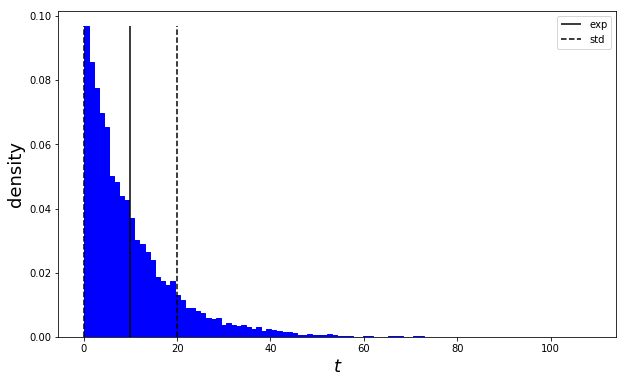

In [3]:
# Plot distribution of interspike intervals drawn from exponential distribution  

def exp_distribution_stats(t, lam):
    '''Calculate expactation value and standard deviation of exponential distribution'''
    
    avg_t = np.mean(t) # ISI trial average
    std_t = np.std(t) # ISI trial std

    exp_t = 1./lam # expected ISI assuming a Poisson process
    var_t = 1./lam**2 # variance ISI assuming a Poisson process
    exp_std_t = np.sqrt(var_t)

    return avg_t, std_t, exp_t, exp_std_t 

lam = 0.1 # rate
N = 10000 # sample size

t = np.random.exponential(1./lam, N) # draw N ISI's

avg_t, std_t, exp_t, exp_std_t = exp_distribution_stats(t, lam)    

print 'rate %.1f' % lam 
print 'ISI trial average: %.3f' % avg_t
print 'ISI expactation value: %.3f' % exp_t
print 'Relative deviation: %.3f' % (np.abs(avg_t - exp_t)/exp_t)
print 
print 'ISI trial std: %.3f' % std_t
print 'ISI expected std: %.3f' % exp_std_t
print 'Relative deviation: %.3f' % (np.abs(std_t - exp_std_t)/exp_std_t)

plt.figure(figsize = (10, 6))

h, _, _ = plt.hist(t, bins = 100, density = True, facecolor = 'b', edgecolor = 'b')
plt.vlines([exp_t, ], 0, np.max(h), linestyles = ['-', '--', '--'], label = 'exp')
plt.vlines([exp_t - exp_std_t, exp_t + exp_std_t], 0, np.max(h), linestyles = ['--', '--'], label = 'std')
plt.xlabel('$t$', fontsize = 18)
plt.ylabel('density', fontsize = 18)

plt.legend()

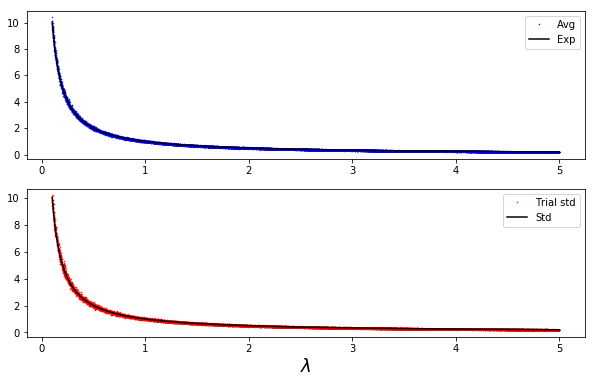

In [4]:
# Plot mean and standard deviation over firing rate  
N = 1000

lam_arr = np.linspace(0.1, 5, 10000)

avg_t_arr = np.zeros_like(lam_arr)
std_t_arr = np.zeros_like(lam_arr)

for i, lam in enumerate(lam_arr):
    
    t = np.random.exponential(1./lam, N) # draw N ISI's

    avg_t, std_t, _, _ = exp_distribution_stats(t, lam)  
    avg_t_arr[i] = avg_t
    std_t_arr[i] = std_t

plt.figure(figsize = (10, 6))
        
gs = plt.GridSpec(2, 1)    

ax0 = plt.subplot(gs[0]) 
ax0.plot(lam_arr, avg_t_arr,  'o', color = 'blue', markersize = 0.5, label =  'Avg')
ax0.plot(lam_arr, 1./lam_arr, '-', color = 'black', label =  'Exp')
plt.legend()    

ax1 = plt.subplot(gs[1])
ax1.plot(lam_arr, std_t_arr, 'o', color = 'red', markersize = 0.5, label =  'Trial std')
plt.plot(lam_arr, 1./lam_arr, '-', color = 'black', label =  'Std')

plt.xlabel('$\lambda$', fontsize = 18)           
plt.legend()    
    

## What can we learn from that?

-  Expectation and standard deviation are inverse proportional to the rate, i.e. both measures will saturate for large rates close to zero
-  The ratio between expectation value and standard deviation is constant, i.e. increasing the rate does not result in a more synchronous activity  

## Spike counts

The number of spikes $n$ observed in a time window of length $T$ are Poisson distributed 

$$p(n)=\frac{(\lambda T)^{n}}{n!}e^{-\lambda T}$$.


As we already mentioned, the spike counts in a time window of length $T$ will be Poisson distributed

$$p(n)=\frac{(\lambda T)^{n}}{n!}e^{-\lambda T}$$.

The expectation value of the Poisson distribution is given by the product of the firing rate and the recording time 

$$\text{E}[p(n)]=\lambda T$$.

Thus, for a fixed recording time $T$, the expected number of spikes increases proportional with the firing rate $\lambda$. One interesting property of the Poisson distributed that the variance is equivalent to the expectation value 

$$\text{E}[p(n)]=\lambda T$$.

We see that the standard deviation increases only with $sqrt{\lambda}$. Thus, the ratio between expectation value and standard deviation  

$$\frac{\text{E}[p(n)]}{\sqrt{\text{Var}[p(n)]}}=\frac{1}{\sqrt{\lambda T}}$$,

gets smaller with increasing $\lambda$. Thus, we expect a narrower distribution if we express the spike count in units of the expectation value. 

For a Poisson process, the occurrence of an event is completely independent of the previous events. This is called the independence property. From this follows that it is equally likely to find a spike at any time point during the recording. This is still if other spikes have been already recorded. Thus, we can simply draw the number of spikes $n$ from a Poisson distribution and distribute them uniformly within the time window of the recording to obtain the spike times. We now show that this approach yields the expected distribution for the ISI's.    


Uniformly distributed spike times
ISI trial average: 0.200
ISI expactation value: 10.000
Relative deviation: 0.980

ISI trial std: 0.187
ISI expected std: 10.000
Relative deviation: 0.981


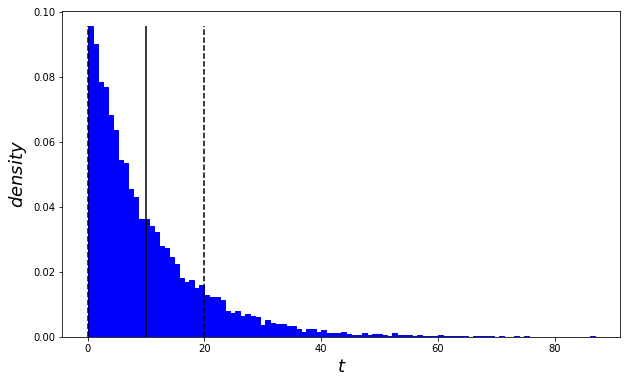

In [5]:
lam = 0.1 
T = 100000 # choose larger recording time to match sample size in first figure

n = np.random.poisson(lam*T) # spike count

spike_times = np.sort(np.random.uniform(0, T, n))

t = np.diff(spike_times)

print
print 'Uniformly distributed spike times'
print 'ISI trial average: %.3f' % avg_t
print 'ISI expactation value: %.3f' % exp_t
print 'Relative deviation: %.3f' % (np.abs(avg_t - exp_t)/exp_t)
print 
print 'ISI trial std: %.3f' % std_t
print 'ISI expected std: %.3f' % exp_std_t
print 'Relative deviation: %.3f' % (np.abs(std_t - exp_std_t)/exp_std_t)

avg_t = np.mean(t) # ISI trial average
std_t = np.std(t) # ISI trial std

plt.figure(figsize = (10, 6))

h, _, _ = plt.hist(t, bins = 100, density = True, facecolor = 'b', edgecolor = 'b')
plt.vlines([exp_t, exp_t - exp_std_t, exp_t + exp_std_t], 0, np.max(h), linestyles = ['-', '--', '--'], label = ['exp', 'avg'])
plt.xlabel('$t$', fontsize = 18)
plt.ylabel('$density$', fontsize = 18)

plt.show()

We now look at the spike trains for an ensemble of realizations (trials) of the same Poisson process and the distribution of the spike counts pooled over all trials. 

Spike count trial average: 10.028
Spike count expactation value: 10.000
Relative deviation: 0.003

Spike count std: 3.111
Spike count expected std: 3.162
Relative deviation: 0.016


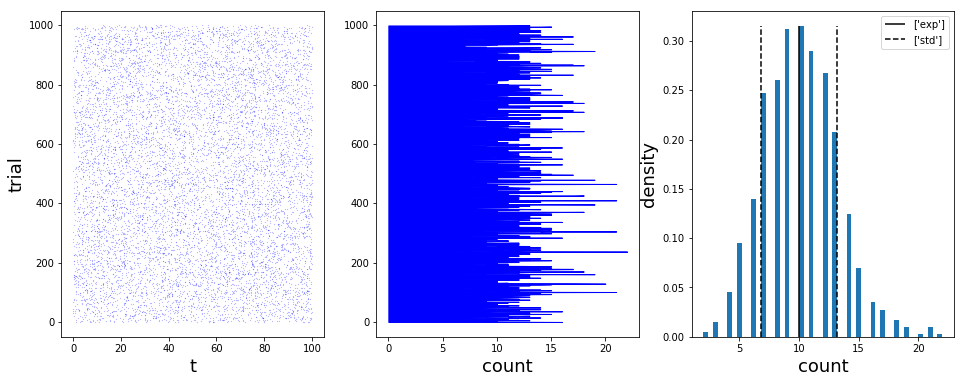

In [6]:
def generate_spike_trains(lam, T, N):
    
    trials = []
    spike_counts = np.zeros(N)
    
    for i in xrange(N):

        n = np.random.poisson(lam*T) # draw number of spikes
        spike_counts[i] = n
        spike_times = np.random.uniform(0, T, n) # generate spike times
        trials.append(spike_times)
        
    return trials, spike_counts

N = 1000 # number of trials
T = 100 # recording time  
lam = 0.1 # rate

# generate spike times for N trials 
trials, spike_counts = generate_spike_trains(lam, T, N)

# plot spike trains
fig = plt.figure(figsize = (16, 6))
gs = plt.GridSpec(1,3)
ax0 = plt.subplot(gs[0])  

for i, trial in enumerate(trials):
 
    ax0.plot(trial, i*np.ones_like(trial), 'o', color = 'b', markersize = 0.1)
    spike_counts[i] = len(trial) # spike count

avg_n = np.mean(spike_counts) # spike count trial average
std_n = np.std(spike_counts) # spike count trial std

exp_n = T*lam # expected number of spikes
exp_std_n = np.sqrt(T*lam) # expected number of spikes

print 'Spike count trial average: %.3f' % avg_n
print 'Spike count expactation value: %.3f' % exp_n
print 'Relative deviation: %.3f' % (np.abs(avg_n - exp_n)/exp_n)
print 
print 'Spike count std: %.3f' % std_n
print 'Spike count expected std: %.3f' % exp_std_n
print 'Relative deviation: %.3f' % (np.abs(std_n - exp_std_n)/exp_std_n)

ax0.set_xlabel('t', fontsize = 18)
ax0.set_ylabel('trial', fontsize = 18)
 
ax1 = plt.subplot(gs[1]) 
ax1.fill_betweenx(np.arange(N), 0, spike_counts, color = 'b')
ax1.set_xlabel('count', fontsize = 18)
 
#------------------------------------------------------------------------------ 
# Plot distribution of counts 

ax2 = plt.subplot(gs[2])  

h, _, _ = ax2.hist(spike_counts, bins = 50, density = True)
ax2.vlines(exp_n, 0, np.max(h), linestyles = ['-', '--', '--'], label = ['exp'])
ax2.vlines([exp_n - exp_std_n, exp_n + exp_std_n], 0, np.max(h), linestyles = ['--', '--'], label = ['std'])

plt.xlabel('count', fontsize = 18)
plt.ylabel('density', fontsize = 18)
plt.legend()



We now check if the distribution of spike counts gets narrower in units of expectation value for increasing $\lambda$.

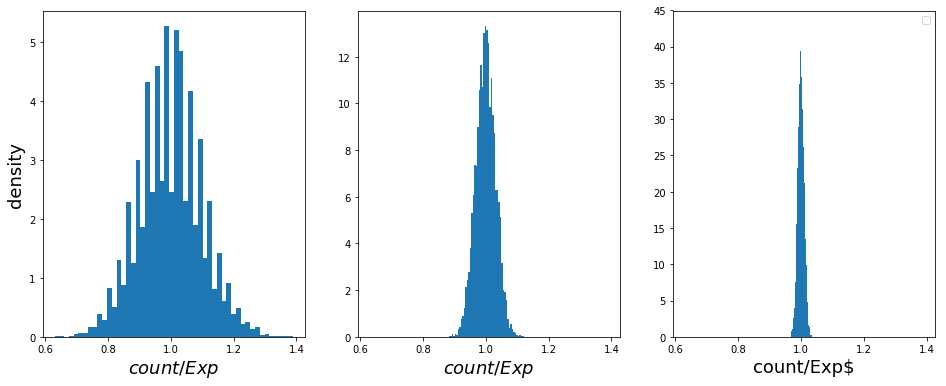

In [8]:
N = 10000 # number of trials
T = 1000 # recording time  

lam0 = 0.1 # rate
lam1 = 1. # rate
lam2 = 10. # rate

# expectation value
exp_n0 = lam0*T
exp_n1 = lam1*T
exp_n2 = lam2*T

#expected std
std_n0 = np.sqrt(exp_n0)
std_n1 = np.sqrt(exp_n1)
std_n2 = np.sqrt(exp_n2)

# generate spike times for N trials 
_, spike_counts0 = generate_spike_trains(lam0, T, N)
_, spike_counts1 = generate_spike_trains(lam1, T, N)
_, spike_counts2 = generate_spike_trains(lam2, T, N)

# plot spike count distribution
fig = plt.figure(figsize = (16, 6))
gs = plt.GridSpec(1,3)

ax0 = plt.subplot(gs[0])  
ax0.hist(spike_counts0/exp_n0, bins = 50, density = True)
plt.ylabel('density', fontsize = 18)
plt.xlabel('count/Exp', fontsize = 18)

x_min, x_max = ax0.get_xlim()

ax1 = plt.subplot(gs[1])  
ax1.hist(spike_counts1/exp_n1, bins = 50, density = True)
ax1.set_xlim(x_min, x_max)

plt.xlabel('count/Exp', fontsize = 18)

ax2 = plt.subplot(gs[2])  
ax2.hist(spike_counts2/exp_n2, bins = 50, density = True)
ax2.set_xlim(x_min, x_max)

plt.xlabel('count/Exp', fontsize = 18)
plt.legend()


### What can we learn from that? 
-  For infinite recording time $T\rightarrow\infty$, the ratio between expectation value and standard deviation vanishes
-  The ratio between expectation value and standard deviation decreases with higher firing rate 
-  Spike counts in different trials become more similar if measured in units of the expectation value 
- If I would want to encode something in the spike count, ideally I would choose a high rate and a long recording time  
